In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import balanced_accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import os

path_raw = "F:/Masters/Data_Science/Code_C1/Data/" 
path_processed = "F:/Masters/Data_Science/Code_C1/Processed_Data/" 
folder_path = "F:/Masters/Data_Science/Code_C1/"

## Combining Data

In [2]:
import pandas as pd
import os

def drop_columns(data):
    # Drop unnecessary columns
    data = data.drop(["Event", "Event value", "Recording timestamp", "Computer timestamp", "Sensor",
                      "Export date", "Recording date", "Recording date UTC", "Recording start time",
                      "Recording start time UTC", "Recording duration", "Timeline name",
                      "Recording Fixation filter name", "Recording software version", 
                      "Recording resolution height", "Recording resolution width", 
                      "Recording monitor latency", "Eyetracker timestamp", 
                      "Presented Media position X (DACSpx)", "Presented Media position Y (DACSpx)",
                      "Eye movement type"], axis=1)
    return data

def fill_missing_values(data):
    # Fill missing values with forward-fill method
    data["Pupil diameter left"] = data["Pupil diameter left"].ffill()
    data["Pupil diameter right"] = data["Pupil diameter right"].ffill()
    return data

def process_file(file):
    # Read the file and drop unnecessary rows and columns
    data = pd.read_csv(path_raw+file, low_memory=False)
    data = data.iloc[2:,1:]
    data = data.loc[data["Eye movement type"]=="Fixation"]
    
    # Drop Mouse position X and Mouse position Y columns if they exist
    if ("Mouse position X" in data.columns) & ("Mouse position Y" in data.columns):
        data = data.drop(["Mouse position X","Mouse position Y"], axis=1)
    
    # Drop rows with missing values, reset index, and process participant name
    data = drop_columns(data)
    data = fill_missing_values(data)
    data = data.dropna()
    data = data.reset_index(drop=True)
    if data["Participant name"].iloc[0][-2] == "0":
        data["Participant name"] = int(data["Participant name"].iloc[0][-1])
    else:
        data["Participant name"] = int(data["Participant name"].iloc[0][-2]+data["Participant name"].iloc[0][-1])
    return data

def process_files(path_raw, path_processed):
    # Process all files in the raw data directory and combine them into a single dataframe
    comb_file = pd.DataFrame()
    for file in os.listdir(path_raw):
        print(file)
        data = process_file(file)
        comb_file = pd.concat([comb_file,data])
        
    # Reset index and save the combined dataframe as a feather file
    comb_file = comb_file.reset_index(drop=True)  
    comb_file.to_csv(path_processed+"combined_data.csv",index=False)

# Process the files in the raw data directory
process_files(path_raw, path_processed)

EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_10.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_11.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_12.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_13.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_14.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_15.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_16.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_17.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_18.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_19.csv
EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_2.csv
EyeT_group_dataset_III_image_name_letter_

EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_5.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_6.csv
EyeT_group_dataset_III_image_name_letter_card_participant_27_trial_7.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_29_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_parti

EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_5.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_6.csv
EyeT_group_dataset_III_image_name_letter_card_participant_51_trial_7.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_0.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_1.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_2.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_4.csv
EyeT_group_dataset_III_image_name_letter_card_participant_53_trial_5.csv
EyeT_group_dataset_III_image_name_letter_card_parti

EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_25.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_26.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_27.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_28.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_29.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_3.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_30.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_31.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_32.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_33.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_34.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_35.csv
EyeT_group_dataset_III_image_name_letter_card_participant_9_trial_36.csv
EyeT_group_dataset_III_image_name_letter_card_partic

EyeT_group_dataset_II_image_name_grey_orange_participant_16_trial_3.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_0.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_1.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_20_trial_3.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_0.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_1.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_22_trial_3.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_24_trial_1.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_24_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_26_trial_2.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_28_trial_0.csv
EyeT_group_dataset_II_image_name_grey_orange_participant_28_tria

## Merging Data

In [27]:
# Merging the Combined file with Questionaire Data

comb_file = pd.read_csv(path_processed+"combined_data.csv")

questionaire_A = pd.read_csv(folder_path+"Questionnaire_datasetIA.csv",encoding='latin-1')
questionaire_A = questionaire_A[["Participant nr","Total Score extended","Total Score original"]].rename(columns={"Participant nr":"Participant name"})
before_giving_stimuli = comb_file.merge(questionaire_A,how="left",on=["Participant name"])
before_giving_stimuli.to_csv(path_processed+"combined_data_before.csv",index=False)

questionaire_B = pd.read_csv(folder_path+"Questionnaire_datasetIB.csv",encoding='latin-1')
questionaire_B = questionaire_B[["Participant nr","Total Score extended","Total Score original"]].rename(columns={"Participant nr":"Participant name"})
after_giving_stimuli = comb_file.merge(questionaire_B,how="left",on=["Participant name"])
after_giving_stimuli.to_csv(path_processed+"combined_data_after.csv",index=False)

## Data Analysis

**Changes in Score Before and After the Stimuli**

In [28]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

for p in list(after_giving_stimuli["Participant name"].unique()):
    t = after_giving_stimuli.loc[after_giving_stimuli["Participant name"]==p]
    t2 = before_giving_stimuli.loc[before_giving_stimuli["Participant name"]==p]
    
    t = t.reset_index(drop=True)
    t2 = t2.reset_index(drop=True)
    
    if t["Recording name"].nunique() == 4:
        t["Project name"] = "Control group experiment"
        t2["Project name"] = "Control group experiment"
    else:
        t["Project name"] = "Test group experiment"
        t2["Project name"] = "Test group experiment"
        
    df1 = pd.concat([df1,t])
    df2 = pd.concat([df2,t2])

df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

after_giving_stimuli = df1.copy()
before_giving_stimuli = df2.copy()

In [34]:
after_score_changes = after_giving_stimuli.groupby(by=["Project name","Participant name"],as_index=False)["Total Score original"].mean().rename(columns={"Total Score original":"Score_After"})
before_score_changes = before_giving_stimuli.groupby(by=["Project name","Participant name"],as_index=False)["Total Score original"].mean().rename(columns={"Total Score original":"Score_Before"})

In [36]:
changes_score = after_score_changes.copy()
changes_score = changes_score.merge(before_score_changes,how="left",on=["Project name","Participant name"])
changes_score["Score_Diff"] = changes_score["Score_After"] - changes_score["Score_Before"]

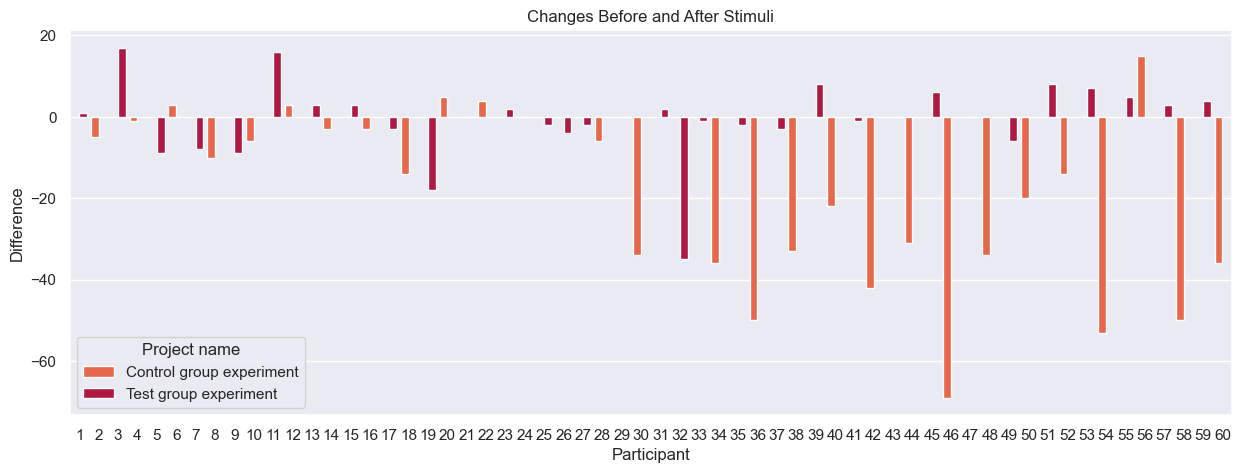

In [37]:
# Score Changes Before and After Stimuli
# The Control group saw a larger decline in Empathy scores than the Test group after the presentation of Stimulus

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="Participant name",y="Score_Diff",hue='Project name',data=changes_score,palette=colors)
plt.title("Changes Before and After Stimuli")
plt.xlabel("Participant")
plt.ylabel("Difference")
plt.show()

**No of Recordings per Participant**

In [8]:
rec_per_pn = after_giving_stimuli.groupby(by=["Project name","Participant name"],as_index=False)["Recording name"].nunique()
rec_per_pn = rec_per_pn.rename(columns={"Recording name":"NumofRec"})

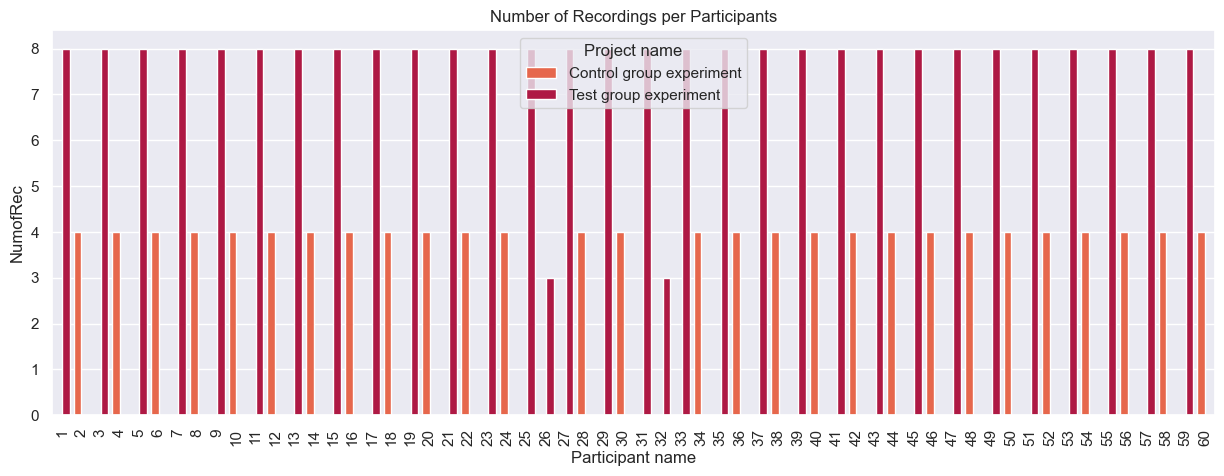

In [9]:
colors = ["#FF5733", "#C70039", "#581845"]
sns.set(rc={'figure.figsize':(15,5)})
barplot = sns.barplot(x="Participant name",y="NumofRec",hue='Project name',data=rec_per_pn,palette=colors)
barplot.set_xticklabels(barplot.get_xticklabels(),rotation=90)
plt.title("Number of Recordings per Participants")
plt.show()

**Score per Particpiant**

In [10]:
after_score_changes = after_giving_stimuli.groupby(by=["Participant name","Project name"],as_index=False)["Total Score original"].mean()

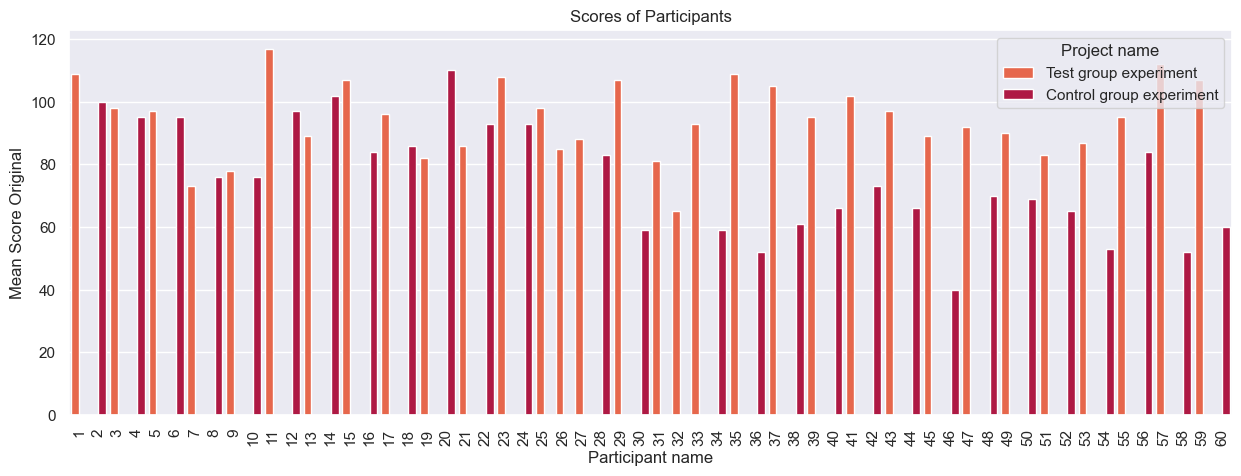

In [11]:
# Plotting the Mean Scores for Each Participant

colors = ["#FF5733", "#C70039", "#581845"]
sns.set(rc={'figure.figsize':(15,5)})
barplot = sns.barplot(x="Participant name",y="Total Score original",hue='Project name',data=after_score_changes,palette=colors)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
plt.ylabel("Mean Score Original")
plt.title("Scores of Participants")
plt.show()

## AI Modelling

In [12]:
# Selecting the Columns to Keep

modelling_data = after_giving_stimuli[["Participant name","Recording name","Gaze point X","Gaze point Y","Pupil diameter left","Pupil diameter right",
                   "Presented Media width","Presented Media height","Gaze event duration","Eye movement type index",
                   "Fixation point X","Fixation point Y","Total Score original"]]
modelling_data = modelling_data.reset_index(drop=True)
modelling_data = modelling_data.rename(columns={"Total Score original":"Empathy_Score"})

In [13]:
# Changing the Data type of Pupil Diameter to Float

modelling_data["Pupil diameter left"] = modelling_data["Pupil diameter left"].str.replace(",",".").astype("float64")
modelling_data["Pupil diameter right"] = modelling_data["Pupil diameter right"].str.replace(",",".").astype("float64")

In [14]:
# Selecting the Columns to Calculate Statistics

df_stats = modelling_data.groupby(["Participant name","Recording name"])[["Gaze point X", "Gaze point Y", 
                                                                          "Pupil diameter left", 
                                                                          "Pupil diameter right", "Presented Media width", 
                                                                          "Presented Media height", "Gaze event duration", 
                                                                          "Eye movement type index", 
                                                                          "Fixation point X", 
                                                                          "Fixation point Y"]].agg(['median','mean','std'])

df_stats.columns = [f"{col}_{stat}" for col,stat in df_stats.columns]
df_stats = df_stats.reset_index()

modelling_data = modelling_data.merge(df_stats,on=["Participant name", "Recording name"])
modelling_data = modelling_data.drop_duplicates(subset=["Participant name","Recording name"])
modelling_data = modelling_data.drop(["Participant name","Recording name"],axis=1)
modelling_data = modelling_data.reset_index(drop=True)
modelling_data = modelling_data.drop(["Gaze point X", "Gaze point Y", "Pupil diameter left", "Pupil diameter right", 
                                      "Presented Media width", "Presented Media height", "Gaze event duration", 
                                       "Eye movement type index", "Fixation point X", "Fixation point Y"], axis=1)
modelling_data

,Empathy_Score,Gaze point X_median,Gaze point X_mean,Gaze point X_std,Gaze point Y_median,Gaze point Y_mean,Gaze point Y_std,Pupil diameter left_median,Pupil diameter left_mean,Pupil diameter left_std,...,Gaze event duration_std,Eye movement type index_median,Eye movement type index_mean,Eye movement type index_std,Fixation point X_median,Fixation point X_mean,Fixation point X_std,Fixation point Y_median,Fixation point Y_mean,Fixation point Y_std
0,109,998.0,1037.392070,259.293057,347.0,397.955507,208.910349,3.10,3.090868,0.151629,...,99.106862,164.0,163.607489,52.392995,1001.0,1037.340969,258.853556,343.0,397.771806,208.815522
1,109,963.0,977.585095,308.367768,387.0,432.522393,207.057554,3.03,3.027886,0.111750,...,89.138607,151.0,151.819061,60.414382,963.0,977.623791,308.101423,381.0,432.685417,206.707494
2,109,959.0,956.542629,256.413760,561.0,492.889641,225.229262,3.12,3.111275,0.105634,...,110.260267,131.0,131.318327,60.368457,960.5,956.671315,255.821381,561.5,492.894821,224.805964
3,109,958.0,950.418668,204.308188,517.0,485.595275,229.306415,3.05,3.055250,0.111735,...,100.099174,210.0,206.576491,101.805787,958.0,950.353989,204.062655,527.0,485.796863,228.973738
4,109,984.0,983.003288,263.758793,569.0,498.879645,219.195304,3.05,3.046672,0.139063,...,104.939601,121.0,130.579415,66.874928,982.0,982.835252,263.589598,574.0,499.083196,218.741731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,110,760.0,849.258421,325.827462,288.0,391.615406,262.450895,3.13,3.134575,0.340471,...,388.512577,86.0,86.447267,43.813000,759.0,849.223909,325.734887,296.0,391.523468,262.348388
354,93,894.0,883.319780,198.066511,532.0,549.150275,226.747560,3.37,3.337442,0.219072,...,287.288297,80.0,83.234341,41.684420,894.0,883.291209,197.485401,531.0,549.202198,226.695235
355,93,829.0,841.006814,216.263246,471.0,515.237933,237.645908,3.60,3.532365,0.366183,...,112.537972,106.0,106.950596,55.738581,826.0,840.891823,215.661763,474.0,515.303521,237.543619
356,93,798.0,847.966987,255.159118,439.0,478.450288,213.584519,3.57,3.496660,0.347554,...,102.725539,72.0,75.547025,41.497874,798.0,848.325144,254.742959,440.0,478.726679,213.540955


In [15]:
# Categorizing the Data for Classification

modelling_data['Empathy_Score_Bin'] = pd.qcut(modelling_data["Empathy_Score"],3,labels=list('012'))
modelling_data['Empathy_Score_Bin'] = modelling_data['Empathy_Score_Bin'].astype('int64')

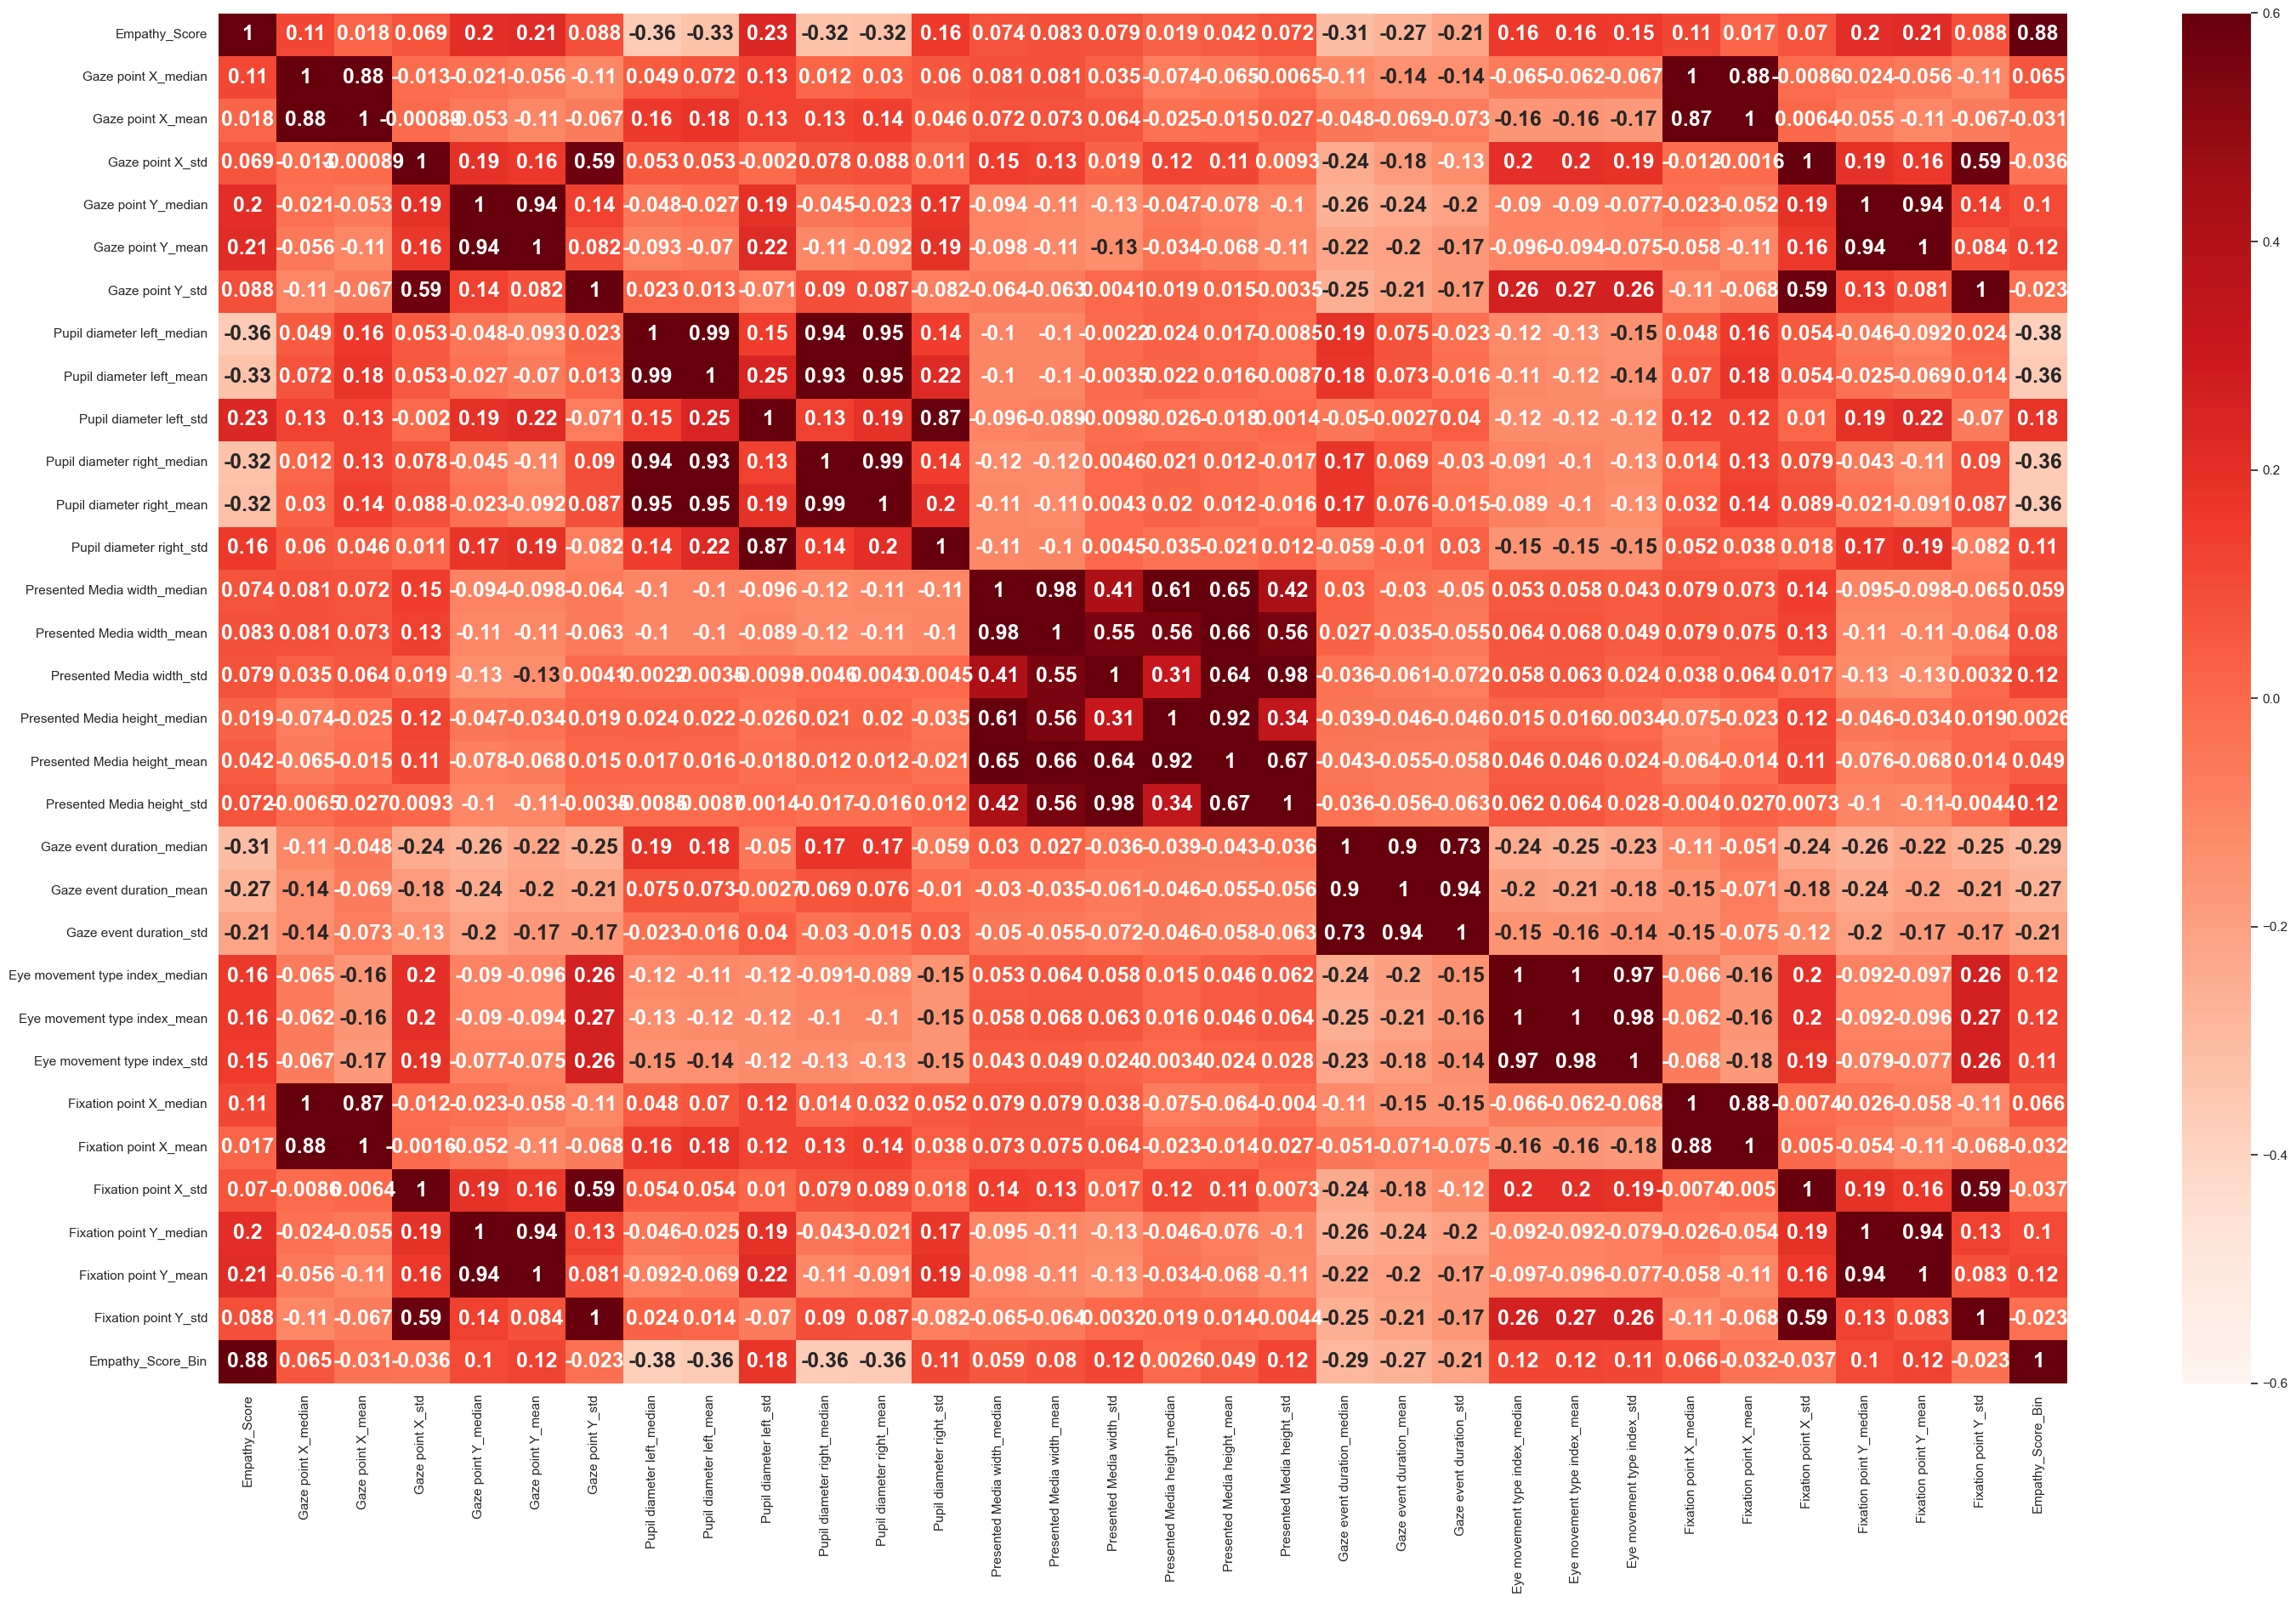

In [16]:
# Correlation Matrix

plt.figure(figsize=(30,19))
sns.heatmap(modelling_data.corr(),annot=True,linewidths=0,vmin=-0.60,vmax=0.60,cmap="Reds",annot_kws={"size":18,"weight":"bold"})
plt.tight_layout()
plt.show()

In [38]:
# Number of Examples Per Class

modelling_data["Empathy_Score_Bin"].value_counts()

1    128
0    122
2    108
Name: Empathy_Score_Bin, dtype: int64

In [17]:
# Spltting the Data in 80-20 Split Ration

X = modelling_data.drop(["Empathy_Score","Empathy_Score_Bin"], axis=1)
Y = modelling_data[["Empathy_Score_Bin"]]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=42)

### Cat Boosting Classifier
CatBoost is a gradient boosting library that uses decision trees and is particularly suitable for classification tasks due to its ability to handle categorical features naturally. It employs a unique approach of using ordered boosting, random permutations, and gradient-based learning to improve model performance and handle data with missing values.

In [47]:
cb = CatBoostClassifier(random_state=0)

# Initial Evaluation of the Performance using Cross-Validation

cross_val_score_initial = cross_val_score(cb,train_X.values,train_Y.values.ravel(),cv=5,scoring="balanced_accuracy",n_jobs=-1)
print("We have Initial Cross-Validation Score of = ",np.mean(cross_val_score_initial))

# Initial Test Scores

cb.fit(train_X.values,train_Y.values.ravel(),verbose=False)
test_score_initial = balanced_accuracy_score(cb.predict(test_X),test_Y)

print("We have Initial Test Score of = ",test_score_initial)

We have Initial Cross-Validation Score of =  0.8061097187412976
We have Initial Test Score of =  0.8766183574879228


In [48]:
# Selecting the Best Features using Recursive Feature Elimination and Cross Validation

rfe_feature_sel = RFECV(estimator=cb,step=5,cv=5,n_jobs=-1,verbose=False)
rfe_feature_sel.fit(train_X,train_Y.values.ravel())
print("The Number of Important Features are = ",rfe_feature_sel.n_features_)

train_X_best = train_X[[rfe_feature_sel.feature_names_in_[a] for a,b in enumerate(rfe_feature_sel.ranking_) if b ==1]]
test_X_best = test_X[[rfe_feature_sel.feature_names_in_[a] for a,b in enumerate(rfe_feature_sel.ranking_) if b ==1]]

cb.fit(train_X_best,train_Y.values.ravel(),verbose=False)
print("After Feature Selection the Test Score is = ",balanced_accuracy_score(cb.predict(test_X_best,verbose=False),test_Y))

Learning rate set to 0.074233
0:	learn: 1.0750569	total: 11.8ms	remaining: 11.8s
1:	learn: 1.0547449	total: 22.5ms	remaining: 11.2s
2:	learn: 1.0302061	total: 33.1ms	remaining: 11s
3:	learn: 1.0050396	total: 43.4ms	remaining: 10.8s
4:	learn: 0.9858941	total: 58.6ms	remaining: 11.7s
5:	learn: 0.9688442	total: 69.2ms	remaining: 11.5s
6:	learn: 0.9532353	total: 80.4ms	remaining: 11.4s
7:	learn: 0.9364195	total: 91.7ms	remaining: 11.4s
8:	learn: 0.9214283	total: 102ms	remaining: 11.3s
9:	learn: 0.9038744	total: 113ms	remaining: 11.2s
10:	learn: 0.8893827	total: 124ms	remaining: 11.2s
11:	learn: 0.8739385	total: 135ms	remaining: 11.1s
12:	learn: 0.8600627	total: 151ms	remaining: 11.4s
13:	learn: 0.8469395	total: 162ms	remaining: 11.4s
14:	learn: 0.8386078	total: 166ms	remaining: 10.9s
15:	learn: 0.8257492	total: 177ms	remaining: 10.9s
16:	learn: 0.8120769	total: 188ms	remaining: 10.9s
17:	learn: 0.7974741	total: 200ms	remaining: 10.9s
18:	learn: 0.7877054	total: 212ms	remaining: 10.9s
19:	l

166:	learn: 0.1903474	total: 2.07s	remaining: 10.3s
167:	learn: 0.1894888	total: 2.08s	remaining: 10.3s
168:	learn: 0.1882273	total: 2.09s	remaining: 10.3s
169:	learn: 0.1865613	total: 2.1s	remaining: 10.3s
170:	learn: 0.1852601	total: 2.12s	remaining: 10.3s
171:	learn: 0.1836145	total: 2.13s	remaining: 10.2s
172:	learn: 0.1824507	total: 2.14s	remaining: 10.2s
173:	learn: 0.1812419	total: 2.15s	remaining: 10.2s
174:	learn: 0.1809141	total: 2.16s	remaining: 10.2s
175:	learn: 0.1797995	total: 2.17s	remaining: 10.2s
176:	learn: 0.1778488	total: 2.19s	remaining: 10.2s
177:	learn: 0.1762033	total: 2.2s	remaining: 10.2s
178:	learn: 0.1748354	total: 2.21s	remaining: 10.1s
179:	learn: 0.1739602	total: 2.22s	remaining: 10.1s
180:	learn: 0.1731481	total: 2.23s	remaining: 10.1s
181:	learn: 0.1717075	total: 2.25s	remaining: 10.1s
182:	learn: 0.1706281	total: 2.26s	remaining: 10.1s
183:	learn: 0.1696948	total: 2.28s	remaining: 10.1s
184:	learn: 0.1690057	total: 2.32s	remaining: 10.2s
185:	learn: 0.

336:	learn: 0.0799862	total: 4.34s	remaining: 8.53s
337:	learn: 0.0797943	total: 4.36s	remaining: 8.53s
338:	learn: 0.0793732	total: 4.37s	remaining: 8.53s
339:	learn: 0.0790980	total: 4.39s	remaining: 8.52s
340:	learn: 0.0788630	total: 4.4s	remaining: 8.51s
341:	learn: 0.0786210	total: 4.42s	remaining: 8.51s
342:	learn: 0.0783282	total: 4.43s	remaining: 8.49s
343:	learn: 0.0781380	total: 4.45s	remaining: 8.48s
344:	learn: 0.0778529	total: 4.46s	remaining: 8.46s
345:	learn: 0.0777592	total: 4.47s	remaining: 8.45s
346:	learn: 0.0774781	total: 4.49s	remaining: 8.44s
347:	learn: 0.0771792	total: 4.5s	remaining: 8.43s
348:	learn: 0.0767886	total: 4.51s	remaining: 8.42s
349:	learn: 0.0765988	total: 4.52s	remaining: 8.4s
350:	learn: 0.0762197	total: 4.54s	remaining: 8.39s
351:	learn: 0.0758268	total: 4.55s	remaining: 8.38s
352:	learn: 0.0753550	total: 4.57s	remaining: 8.38s
353:	learn: 0.0750558	total: 4.58s	remaining: 8.36s
354:	learn: 0.0747526	total: 4.59s	remaining: 8.35s
355:	learn: 0.0

496:	learn: 0.0487953	total: 6.47s	remaining: 6.55s
497:	learn: 0.0487442	total: 6.49s	remaining: 6.54s
498:	learn: 0.0485880	total: 6.5s	remaining: 6.53s
499:	learn: 0.0484703	total: 6.51s	remaining: 6.51s
500:	learn: 0.0483726	total: 6.53s	remaining: 6.5s
501:	learn: 0.0482796	total: 6.54s	remaining: 6.49s
502:	learn: 0.0480493	total: 6.55s	remaining: 6.47s
503:	learn: 0.0479279	total: 6.56s	remaining: 6.46s
504:	learn: 0.0478227	total: 6.57s	remaining: 6.44s
505:	learn: 0.0477400	total: 6.59s	remaining: 6.43s
506:	learn: 0.0476167	total: 6.6s	remaining: 6.42s
507:	learn: 0.0474822	total: 6.61s	remaining: 6.4s
508:	learn: 0.0473508	total: 6.62s	remaining: 6.39s
509:	learn: 0.0472615	total: 6.63s	remaining: 6.38s
510:	learn: 0.0470940	total: 6.65s	remaining: 6.36s
511:	learn: 0.0468809	total: 6.66s	remaining: 6.35s
512:	learn: 0.0467643	total: 6.67s	remaining: 6.33s
513:	learn: 0.0466665	total: 6.68s	remaining: 6.32s
514:	learn: 0.0465543	total: 6.7s	remaining: 6.31s
515:	learn: 0.046

668:	learn: 0.0332058	total: 8.8s	remaining: 4.35s
669:	learn: 0.0331452	total: 8.81s	remaining: 4.34s
670:	learn: 0.0330739	total: 8.83s	remaining: 4.33s
671:	learn: 0.0330066	total: 8.84s	remaining: 4.31s
672:	learn: 0.0329098	total: 8.85s	remaining: 4.3s
673:	learn: 0.0328632	total: 8.86s	remaining: 4.29s
674:	learn: 0.0327503	total: 8.88s	remaining: 4.27s
675:	learn: 0.0326624	total: 8.89s	remaining: 4.26s
676:	learn: 0.0325968	total: 8.9s	remaining: 4.25s
677:	learn: 0.0325398	total: 8.92s	remaining: 4.23s
678:	learn: 0.0325053	total: 8.93s	remaining: 4.22s
679:	learn: 0.0324313	total: 8.95s	remaining: 4.21s
680:	learn: 0.0323634	total: 8.96s	remaining: 4.2s
681:	learn: 0.0323070	total: 8.97s	remaining: 4.18s
682:	learn: 0.0322367	total: 8.98s	remaining: 4.17s
683:	learn: 0.0321774	total: 9s	remaining: 4.16s
684:	learn: 0.0321242	total: 9.01s	remaining: 4.14s
685:	learn: 0.0320742	total: 9.03s	remaining: 4.13s
686:	learn: 0.0320249	total: 9.04s	remaining: 4.12s
687:	learn: 0.03195

841:	learn: 0.0246351	total: 11.1s	remaining: 2.09s
842:	learn: 0.0245631	total: 11.1s	remaining: 2.08s
843:	learn: 0.0245320	total: 11.2s	remaining: 2.06s
844:	learn: 0.0245131	total: 11.2s	remaining: 2.05s
845:	learn: 0.0244634	total: 11.2s	remaining: 2.04s
846:	learn: 0.0244267	total: 11.2s	remaining: 2.02s
847:	learn: 0.0243971	total: 11.2s	remaining: 2.01s
848:	learn: 0.0243759	total: 11.2s	remaining: 2s
849:	learn: 0.0243413	total: 11.2s	remaining: 1.98s
850:	learn: 0.0242973	total: 11.3s	remaining: 1.97s
851:	learn: 0.0242492	total: 11.3s	remaining: 1.96s
852:	learn: 0.0241835	total: 11.3s	remaining: 1.94s
853:	learn: 0.0241501	total: 11.3s	remaining: 1.93s
854:	learn: 0.0241210	total: 11.3s	remaining: 1.92s
855:	learn: 0.0241062	total: 11.3s	remaining: 1.9s
856:	learn: 0.0240739	total: 11.3s	remaining: 1.89s
857:	learn: 0.0240354	total: 11.3s	remaining: 1.88s
858:	learn: 0.0239989	total: 11.4s	remaining: 1.86s
859:	learn: 0.0239768	total: 11.4s	remaining: 1.85s
860:	learn: 0.02

Learning rate set to 0.074233
0:	learn: 1.0750569	total: 40.9ms	remaining: 40.8s
1:	learn: 1.0547449	total: 55ms	remaining: 27.4s
2:	learn: 1.0302061	total: 66.9ms	remaining: 22.2s
3:	learn: 1.0050396	total: 77.6ms	remaining: 19.3s
4:	learn: 0.9858941	total: 90.2ms	remaining: 17.9s
5:	learn: 0.9688442	total: 101ms	remaining: 16.7s
6:	learn: 0.9532353	total: 113ms	remaining: 16.1s
7:	learn: 0.9364195	total: 125ms	remaining: 15.5s
8:	learn: 0.9214283	total: 136ms	remaining: 14.9s
9:	learn: 0.9038744	total: 148ms	remaining: 14.6s
10:	learn: 0.8893827	total: 159ms	remaining: 14.3s
11:	learn: 0.8739385	total: 172ms	remaining: 14.2s
12:	learn: 0.8600627	total: 184ms	remaining: 14s
13:	learn: 0.8469395	total: 196ms	remaining: 13.8s
14:	learn: 0.8386078	total: 199ms	remaining: 13.1s
15:	learn: 0.8257492	total: 214ms	remaining: 13.1s
16:	learn: 0.8120769	total: 229ms	remaining: 13.2s
17:	learn: 0.7974741	total: 241ms	remaining: 13.1s
18:	learn: 0.7877054	total: 252ms	remaining: 13s
19:	learn: 0

171:	learn: 0.1836145	total: 2.34s	remaining: 11.3s
172:	learn: 0.1824507	total: 2.36s	remaining: 11.3s
173:	learn: 0.1812419	total: 2.37s	remaining: 11.3s
174:	learn: 0.1809141	total: 2.39s	remaining: 11.3s
175:	learn: 0.1797995	total: 2.4s	remaining: 11.2s
176:	learn: 0.1778488	total: 2.42s	remaining: 11.2s
177:	learn: 0.1762033	total: 2.43s	remaining: 11.2s
178:	learn: 0.1748354	total: 2.44s	remaining: 11.2s
179:	learn: 0.1739602	total: 2.45s	remaining: 11.2s
180:	learn: 0.1731481	total: 2.47s	remaining: 11.2s
181:	learn: 0.1717075	total: 2.48s	remaining: 11.1s
182:	learn: 0.1706281	total: 2.49s	remaining: 11.1s
183:	learn: 0.1696948	total: 2.51s	remaining: 11.1s
184:	learn: 0.1690057	total: 2.52s	remaining: 11.1s
185:	learn: 0.1681068	total: 2.53s	remaining: 11.1s
186:	learn: 0.1669853	total: 2.54s	remaining: 11.1s
187:	learn: 0.1659155	total: 2.56s	remaining: 11.1s
188:	learn: 0.1644160	total: 2.57s	remaining: 11s
189:	learn: 0.1630444	total: 2.59s	remaining: 11s
190:	learn: 0.162

345:	learn: 0.0777592	total: 4.69s	remaining: 8.86s
346:	learn: 0.0774781	total: 4.7s	remaining: 8.85s
347:	learn: 0.0771792	total: 4.71s	remaining: 8.84s
348:	learn: 0.0767886	total: 4.73s	remaining: 8.82s
349:	learn: 0.0765988	total: 4.74s	remaining: 8.8s
350:	learn: 0.0762197	total: 4.75s	remaining: 8.79s
351:	learn: 0.0758268	total: 4.76s	remaining: 8.77s
352:	learn: 0.0753550	total: 4.78s	remaining: 8.75s
353:	learn: 0.0750558	total: 4.79s	remaining: 8.74s
354:	learn: 0.0747526	total: 4.8s	remaining: 8.72s
355:	learn: 0.0744704	total: 4.81s	remaining: 8.71s
356:	learn: 0.0741323	total: 4.83s	remaining: 8.69s
357:	learn: 0.0738496	total: 4.84s	remaining: 8.68s
358:	learn: 0.0737246	total: 4.85s	remaining: 8.66s
359:	learn: 0.0735122	total: 4.87s	remaining: 8.66s
360:	learn: 0.0733028	total: 4.88s	remaining: 8.64s
361:	learn: 0.0729953	total: 4.9s	remaining: 8.63s
362:	learn: 0.0728060	total: 4.92s	remaining: 8.63s
363:	learn: 0.0726372	total: 4.93s	remaining: 8.61s
364:	learn: 0.07

508:	learn: 0.0473508	total: 7.02s	remaining: 6.77s
509:	learn: 0.0472615	total: 7.03s	remaining: 6.75s
510:	learn: 0.0470940	total: 7.04s	remaining: 6.74s
511:	learn: 0.0468809	total: 7.06s	remaining: 6.73s
512:	learn: 0.0467643	total: 7.07s	remaining: 6.71s
513:	learn: 0.0466665	total: 7.09s	remaining: 6.7s
514:	learn: 0.0465543	total: 7.11s	remaining: 6.69s
515:	learn: 0.0464426	total: 7.12s	remaining: 6.68s
516:	learn: 0.0463765	total: 7.13s	remaining: 6.66s
517:	learn: 0.0462828	total: 7.14s	remaining: 6.65s
518:	learn: 0.0461861	total: 7.16s	remaining: 6.63s
519:	learn: 0.0460752	total: 7.17s	remaining: 6.62s
520:	learn: 0.0459836	total: 7.18s	remaining: 6.6s
521:	learn: 0.0458542	total: 7.19s	remaining: 6.59s
522:	learn: 0.0456937	total: 7.2s	remaining: 6.57s
523:	learn: 0.0456016	total: 7.21s	remaining: 6.55s
524:	learn: 0.0455195	total: 7.23s	remaining: 6.54s
525:	learn: 0.0453738	total: 7.24s	remaining: 6.53s
526:	learn: 0.0452505	total: 7.25s	remaining: 6.51s
527:	learn: 0.0

677:	learn: 0.0325398	total: 9.07s	remaining: 4.31s
678:	learn: 0.0325053	total: 9.09s	remaining: 4.3s
679:	learn: 0.0324313	total: 9.1s	remaining: 4.28s
680:	learn: 0.0323634	total: 9.11s	remaining: 4.27s
681:	learn: 0.0323070	total: 9.13s	remaining: 4.25s
682:	learn: 0.0322367	total: 9.14s	remaining: 4.24s
683:	learn: 0.0321774	total: 9.15s	remaining: 4.23s
684:	learn: 0.0321242	total: 9.16s	remaining: 4.21s
685:	learn: 0.0320742	total: 9.17s	remaining: 4.2s
686:	learn: 0.0320249	total: 9.19s	remaining: 4.18s
687:	learn: 0.0319558	total: 9.2s	remaining: 4.17s
688:	learn: 0.0318996	total: 9.21s	remaining: 4.16s
689:	learn: 0.0318652	total: 9.22s	remaining: 4.14s
690:	learn: 0.0317863	total: 9.23s	remaining: 4.13s
691:	learn: 0.0317415	total: 9.25s	remaining: 4.12s
692:	learn: 0.0316540	total: 9.26s	remaining: 4.1s
693:	learn: 0.0315956	total: 9.27s	remaining: 4.09s
694:	learn: 0.0315381	total: 9.28s	remaining: 4.07s
695:	learn: 0.0314978	total: 9.29s	remaining: 4.06s
696:	learn: 0.031

837:	learn: 0.0247915	total: 11.2s	remaining: 2.16s
838:	learn: 0.0247512	total: 11.2s	remaining: 2.15s
839:	learn: 0.0247100	total: 11.2s	remaining: 2.13s
840:	learn: 0.0246703	total: 11.2s	remaining: 2.12s
841:	learn: 0.0246351	total: 11.2s	remaining: 2.11s
842:	learn: 0.0245631	total: 11.3s	remaining: 2.1s
843:	learn: 0.0245320	total: 11.3s	remaining: 2.08s
844:	learn: 0.0245131	total: 11.3s	remaining: 2.07s
845:	learn: 0.0244634	total: 11.3s	remaining: 2.06s
846:	learn: 0.0244267	total: 11.3s	remaining: 2.05s
847:	learn: 0.0243971	total: 11.4s	remaining: 2.04s
848:	learn: 0.0243759	total: 11.4s	remaining: 2.02s
849:	learn: 0.0243413	total: 11.4s	remaining: 2.01s
850:	learn: 0.0242973	total: 11.4s	remaining: 2s
851:	learn: 0.0242492	total: 11.4s	remaining: 1.98s
852:	learn: 0.0241835	total: 11.4s	remaining: 1.97s
853:	learn: 0.0241501	total: 11.4s	remaining: 1.96s
854:	learn: 0.0241210	total: 11.5s	remaining: 1.94s
855:	learn: 0.0241062	total: 11.5s	remaining: 1.93s
856:	learn: 0.02

999:	learn: 0.0197619	total: 13.4s	remaining: 0us
The Number of Important Features are =  30
After Feature Selection the Test Score is =  0.8766183574879228


In [49]:
# Using Random Search to Find the Best Hyper Parameters for the Model

RanSearCV = RandomizedSearchCV(cb,dict(n_estimators=[100,250,500,750,1000],max_leaves=[21,31,41],
                                       learning_rate=[0.001,0.01,0.1]),
                               cv=5,scoring="balanced_accuracy",
                               n_jobs=-1)
optimized_model = RanSearCV.fit(train_X_best.values,train_Y.values.ravel())

cb = CatBoostClassifier(**optimized_model.best_estimator_.get_params())
cb.fit(train_X_best.values,train_Y.values.ravel(),verbose=False)
print("Final Test Score is = = ",balanced_accuracy_score(cb.predict(test_X_best),test_Y))

C:\Users\mshar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mshar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mshar\anaconda3\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\mshar\anaconda3\lib\site-packages\catboost\core.py", line 2339, i

0:	learn: 1.0670612	total: 15.3ms	remaining: 15.3s
1:	learn: 1.0403483	total: 29.6ms	remaining: 14.7s
2:	learn: 1.0083736	total: 44.9ms	remaining: 14.9s
3:	learn: 0.9776895	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9530535	total: 73ms	remaining: 14.5s
5:	learn: 0.9308350	total: 88.1ms	remaining: 14.6s
6:	learn: 0.9115445	total: 102ms	remaining: 14.4s
7:	learn: 0.8914007	total: 115ms	remaining: 14.3s
8:	learn: 0.8728751	total: 128ms	remaining: 14.1s
9:	learn: 0.8518155	total: 144ms	remaining: 14.2s
10:	learn: 0.8344831	total: 157ms	remaining: 14.1s
11:	learn: 0.8151847	total: 169ms	remaining: 13.9s
12:	learn: 0.7990099	total: 181ms	remaining: 13.8s
13:	learn: 0.7837104	total: 194ms	remaining: 13.6s
14:	learn: 0.7739588	total: 198ms	remaining: 13s
15:	learn: 0.7591881	total: 213ms	remaining: 13.1s
16:	learn: 0.7423551	total: 233ms	remaining: 13.5s
17:	learn: 0.7255381	total: 246ms	remaining: 13.4s
18:	learn: 0.7147611	total: 259ms	remaining: 13.4s
19:	learn: 0.7016778	total: 273ms	remai

162:	learn: 0.1428905	total: 2.3s	remaining: 11.8s
163:	learn: 0.1410135	total: 2.32s	remaining: 11.8s
164:	learn: 0.1403353	total: 2.34s	remaining: 11.8s
165:	learn: 0.1393576	total: 2.35s	remaining: 11.8s
166:	learn: 0.1382579	total: 2.37s	remaining: 11.8s
167:	learn: 0.1371808	total: 2.39s	remaining: 11.8s
168:	learn: 0.1357545	total: 2.41s	remaining: 11.8s
169:	learn: 0.1343527	total: 2.42s	remaining: 11.8s
170:	learn: 0.1335840	total: 2.43s	remaining: 11.8s
171:	learn: 0.1325779	total: 2.45s	remaining: 11.8s
172:	learn: 0.1314589	total: 2.46s	remaining: 11.8s
173:	learn: 0.1304949	total: 2.47s	remaining: 11.7s
174:	learn: 0.1297637	total: 2.48s	remaining: 11.7s
175:	learn: 0.1287557	total: 2.5s	remaining: 11.7s
176:	learn: 0.1280942	total: 2.51s	remaining: 11.7s
177:	learn: 0.1268889	total: 2.52s	remaining: 11.7s
178:	learn: 0.1262403	total: 2.54s	remaining: 11.6s
179:	learn: 0.1252041	total: 2.55s	remaining: 11.6s
180:	learn: 0.1242069	total: 2.57s	remaining: 11.6s
181:	learn: 0.

332:	learn: 0.0558969	total: 4.82s	remaining: 9.66s
333:	learn: 0.0556915	total: 4.84s	remaining: 9.65s
334:	learn: 0.0555320	total: 4.85s	remaining: 9.63s
335:	learn: 0.0552619	total: 4.87s	remaining: 9.62s
336:	learn: 0.0550154	total: 4.88s	remaining: 9.6s
337:	learn: 0.0547637	total: 4.89s	remaining: 9.58s
338:	learn: 0.0544164	total: 4.91s	remaining: 9.56s
339:	learn: 0.0541689	total: 4.92s	remaining: 9.55s
340:	learn: 0.0539156	total: 4.93s	remaining: 9.53s
341:	learn: 0.0536891	total: 4.94s	remaining: 9.51s
342:	learn: 0.0534916	total: 4.96s	remaining: 9.49s
343:	learn: 0.0532304	total: 4.97s	remaining: 9.47s
344:	learn: 0.0530522	total: 4.98s	remaining: 9.46s
345:	learn: 0.0529617	total: 4.99s	remaining: 9.44s
346:	learn: 0.0527600	total: 5s	remaining: 9.42s
347:	learn: 0.0525270	total: 5.02s	remaining: 9.4s
348:	learn: 0.0522293	total: 5.03s	remaining: 9.38s
349:	learn: 0.0520777	total: 5.05s	remaining: 9.37s
350:	learn: 0.0519402	total: 5.06s	remaining: 9.36s
351:	learn: 0.051

494:	learn: 0.0333362	total: 6.88s	remaining: 7.02s
495:	learn: 0.0332946	total: 6.9s	remaining: 7.01s
496:	learn: 0.0331862	total: 6.91s	remaining: 6.99s
497:	learn: 0.0331557	total: 6.92s	remaining: 6.98s
498:	learn: 0.0330447	total: 6.93s	remaining: 6.96s
499:	learn: 0.0329747	total: 6.95s	remaining: 6.95s
500:	learn: 0.0329015	total: 6.96s	remaining: 6.93s
501:	learn: 0.0328385	total: 6.97s	remaining: 6.92s
502:	learn: 0.0326766	total: 6.98s	remaining: 6.9s
503:	learn: 0.0325833	total: 7s	remaining: 6.88s
504:	learn: 0.0324992	total: 7.01s	remaining: 6.87s
505:	learn: 0.0324467	total: 7.02s	remaining: 6.85s
506:	learn: 0.0323815	total: 7.03s	remaining: 6.84s
507:	learn: 0.0323135	total: 7.04s	remaining: 6.82s
508:	learn: 0.0322091	total: 7.05s	remaining: 6.8s
509:	learn: 0.0321502	total: 7.07s	remaining: 6.79s
510:	learn: 0.0320326	total: 7.08s	remaining: 6.77s
511:	learn: 0.0319282	total: 7.09s	remaining: 6.76s
512:	learn: 0.0318331	total: 7.11s	remaining: 6.74s
513:	learn: 0.0317

662:	learn: 0.0229884	total: 8.96s	remaining: 4.55s
663:	learn: 0.0229636	total: 8.98s	remaining: 4.54s
664:	learn: 0.0228830	total: 8.99s	remaining: 4.53s
665:	learn: 0.0228156	total: 9.01s	remaining: 4.52s
666:	learn: 0.0227764	total: 9.02s	remaining: 4.5s
667:	learn: 0.0227386	total: 9.04s	remaining: 4.49s
668:	learn: 0.0226884	total: 9.05s	remaining: 4.48s
669:	learn: 0.0226471	total: 9.07s	remaining: 4.46s
670:	learn: 0.0225999	total: 9.08s	remaining: 4.45s
671:	learn: 0.0225712	total: 9.1s	remaining: 4.44s
672:	learn: 0.0225065	total: 9.11s	remaining: 4.42s
673:	learn: 0.0224703	total: 9.12s	remaining: 4.41s
674:	learn: 0.0223949	total: 9.14s	remaining: 4.4s
675:	learn: 0.0223380	total: 9.15s	remaining: 4.39s
676:	learn: 0.0222859	total: 9.17s	remaining: 4.37s
677:	learn: 0.0222480	total: 9.18s	remaining: 4.36s
678:	learn: 0.0222042	total: 9.2s	remaining: 4.35s
679:	learn: 0.0221682	total: 9.21s	remaining: 4.34s
680:	learn: 0.0221435	total: 9.23s	remaining: 4.32s
681:	learn: 0.02

825:	learn: 0.0173953	total: 11.3s	remaining: 2.37s
826:	learn: 0.0173693	total: 11.3s	remaining: 2.36s
827:	learn: 0.0173377	total: 11.3s	remaining: 2.34s
828:	learn: 0.0173096	total: 11.3s	remaining: 2.33s
829:	learn: 0.0172846	total: 11.3s	remaining: 2.32s
830:	learn: 0.0172616	total: 11.3s	remaining: 2.3s
831:	learn: 0.0172231	total: 11.3s	remaining: 2.29s
832:	learn: 0.0172004	total: 11.3s	remaining: 2.27s
833:	learn: 0.0171774	total: 11.4s	remaining: 2.26s
834:	learn: 0.0171359	total: 11.4s	remaining: 2.25s
835:	learn: 0.0171078	total: 11.4s	remaining: 2.23s
836:	learn: 0.0170917	total: 11.4s	remaining: 2.22s
837:	learn: 0.0170657	total: 11.4s	remaining: 2.21s
838:	learn: 0.0170498	total: 11.4s	remaining: 2.19s
839:	learn: 0.0170149	total: 11.4s	remaining: 2.18s
840:	learn: 0.0169871	total: 11.5s	remaining: 2.17s
841:	learn: 0.0169557	total: 11.5s	remaining: 2.15s
842:	learn: 0.0169372	total: 11.5s	remaining: 2.14s
843:	learn: 0.0169124	total: 11.5s	remaining: 2.12s
844:	learn: 0

999:	learn: 0.0136294	total: 13.5s	remaining: 0us
Final Test Score is = =  0.8905072463768117


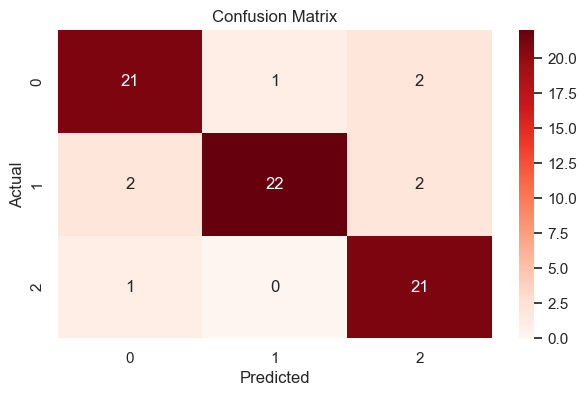

In [52]:
# Showing Results in the Form of a Confusion Matrix

plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix(test_Y,cb.predict(test_X_best),labels=[0,1,2])  ,annot=True,xticklabels=[0,1,2],yticklabels=[0,1,2],cmap="Reds",fmt="g")
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix')
plt.show()

## Conclusion
During our analysis, we noticed that certain summary features had a relatively insignificant effect on the empathy levels of the participants. Despite including them in our initial approach, we found that excluding them did not affect the accuracy of our results. This helped us to streamline our approach and focus on the most impactful variables.

To better identify the empathy levels of the participants, we decided to utilize eye-tracking data. By analyzing variables such as pupil size and gaze, we were able to accurately determine the participants' level of empathy. This approach proved to be quite effective, as it allowed us to obtain precise and reliable results.

Overall, our findings suggest that some variables may have a limited impact on the target outcome, and that utilizing alternative sources of data can often lead to more accurate and insightful results. By continuously exploring and optimizing our approach, we can further improve our understanding of empathy and other complex phenomena.